In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/My\ Drive/data11/Final.zip

Archive:  gdrive/My Drive/data11/Final.zip
   creating: ML Project/Annabeth/
  inflating: ML Project/Annabeth/0149729d1fbb01f93bf92f68b6a0f8e6.jpg  
  inflating: ML Project/Annabeth/29d843fce84c51420c9ec3eaaba23e3c.jpg  
  inflating: ML Project/Annabeth/43d676a5e2849ef19aad900cc698457a.jpg  
  inflating: ML Project/Annabeth/4e178ad9ea3addef53f6d0c1d6abad78.jpg  
  inflating: ML Project/Annabeth/628ccf11d0c21c30dc52ab846cc9c91b.jpg  
  inflating: ML Project/Annabeth/682de2504db82c11a8efaa6e7122d6d4.jpg  
  inflating: ML Project/Annabeth/7f064c86633c3de56c0de0aaeec85dae.jpg  
  inflating: ML Project/Annabeth/8d5345b40cdc39a4a307f7b88f83d454.jpg  
  inflating: ML Project/Annabeth/9vz6ofnqhfe71.jpg  
  inflating: ML Project/Annabeth/abe240a5989211379c5261a62f803bf2.jpg  
  inflating: ML Project/Annabeth/alexandradaddario.jpg  
  inflating: ML Project/Annabeth/AnnabethChase.jpg  
  inflating: ML Project/Annabeth/Annabeth-Chase-Percy-Jackson-and-the-Olympians-2023-Jacket__72041.jpg  
  infla

In [ ]:
import pathlib

dataset_url = "/content/ML Project"
#data_dir = tf.keras.utils.get_file('/content/ML Project', origin=dataset_url, extract=True)
data_dir = pathlib.Path(dataset_url).with_suffix('')

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

450


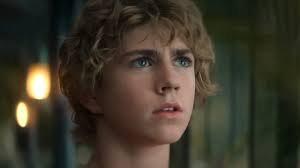

In [ ]:
Percy = list(data_dir.glob('Percy/*'))
PIL.Image.open(str(Percy[1]))

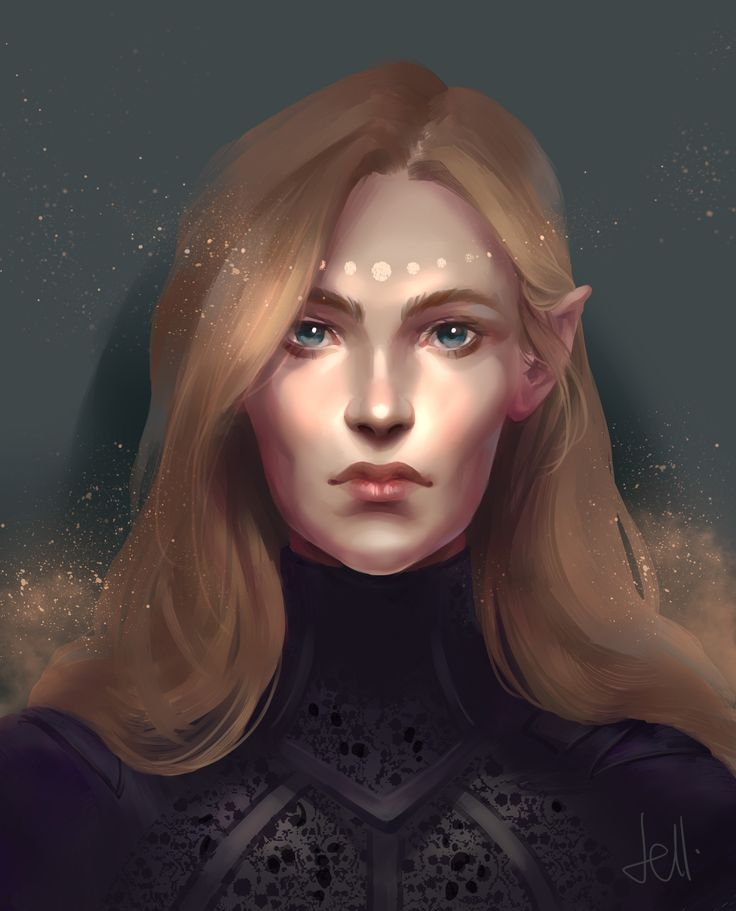

In [ ]:
Feyre = list(data_dir.glob('Feyre/*'))
PIL.Image.open(str(Feyre[10]))

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 450 files belonging to 7 classes.
Using 360 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 450 files belonging to 7 classes.
Using 90 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Annabeth', 'Elain', 'Feyre', 'Grover', 'Luke', 'Nesta', 'Percy']


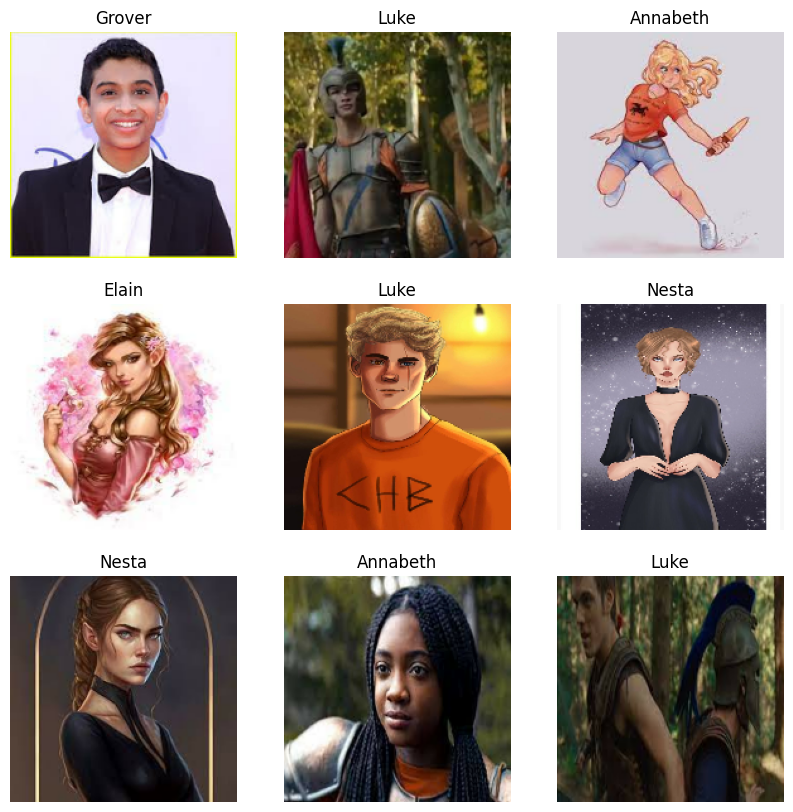

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [ ]:
epochs=50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
12/12 [==============================] - 16s 1s/step - loss: 1.9609 - accuracy: 0.2528 - val_loss: 1.7953 - val_accuracy: 0.3000
Epoch 2/50
12/12 [==============================] - 13s 1s/step - loss: 1.7288 - accuracy: 0.3389 - val_loss: 1.7786 - val_accuracy: 0.3556
Epoch 3/50
12/12 [==============================] - 13s 1s/step - loss: 1.5648 - accuracy: 0.3806 - val_loss: 1.7185 - val_accuracy: 0.3444
Epoch 4/50
12/12 [==============================] - 14s 1s/step - loss: 1.2625 - accuracy: 0.5278 - val_loss: 1.7137 - val_accuracy: 0.3444
Epoch 5/50
12/12 [==============================] - 14s 1s/step - loss: 0.9437 - accuracy: 0.6833 - val_loss: 1.6782 - val_accuracy: 0.3556
Epoch 6/50
12/12 [==============================] - 13s 1s/step - loss: 0.7261 - accuracy: 0.7500 - val_loss: 1.6756 - val_accuracy: 0.3667
Epoch 7/50
12/12 [==============================] - 14s 1s/step - loss: 0.4508 - accuracy: 0.8389 - val_loss: 1.7137 - val_accuracy: 0.3778
Epoch 8/50
12/12 [==

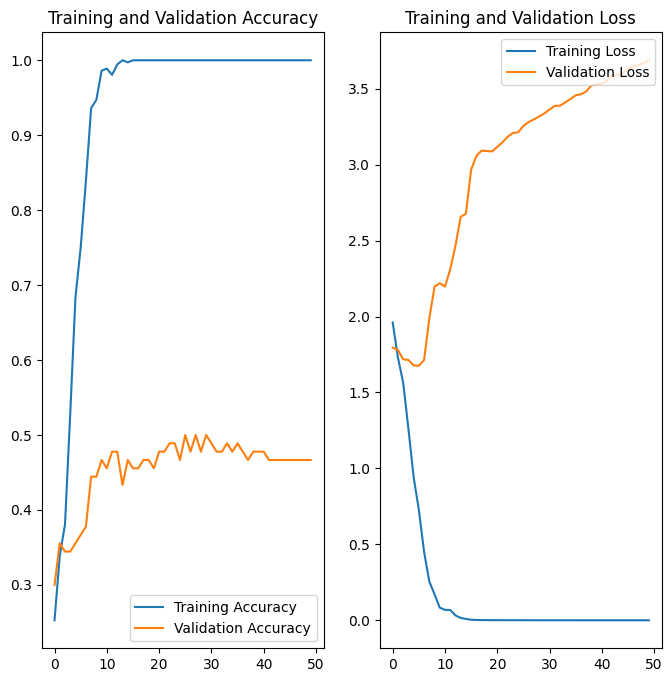

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

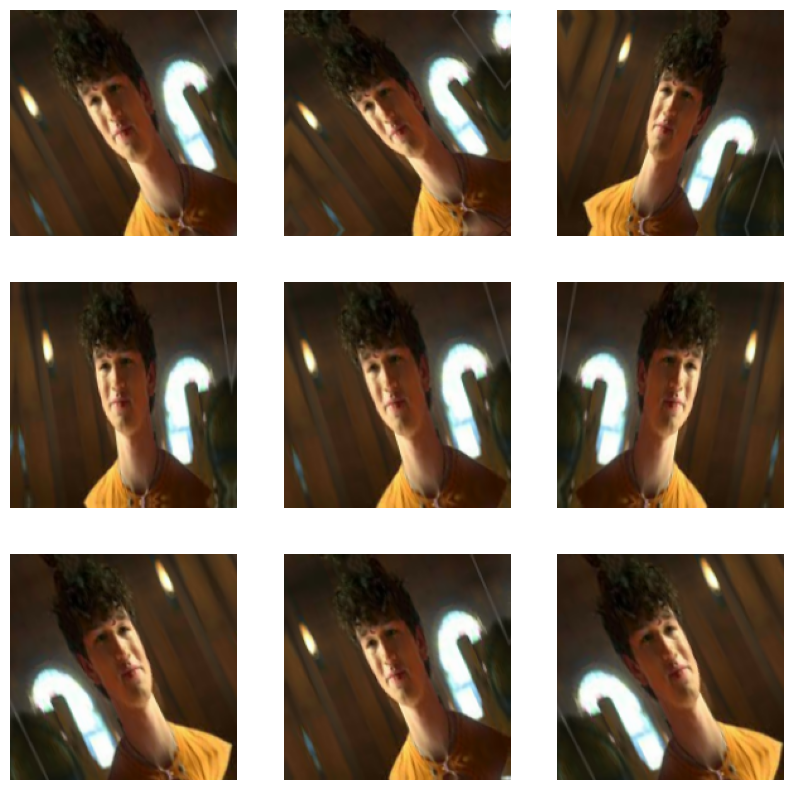

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                 

In [ ]:
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
12/12 [==============================] - 16s 1s/step - loss: 1.9300 - accuracy: 0.1917 - val_loss: 1.8451 - val_accuracy: 0.2889
Epoch 2/50
12/12 [==============================] - 15s 1s/step - loss: 1.7867 - accuracy: 0.2639 - val_loss: 1.8028 - val_accuracy: 0.3111
Epoch 3/50
12/12 [==============================] - 15s 1s/step - loss: 1.6990 - accuracy: 0.3222 - val_loss: 1.7433 - val_accuracy: 0.3222
Epoch 4/50
12/12 [==============================] - 14s 1s/step - loss: 1.5783 - accuracy: 0.3639 - val_loss: 1.7744 - val_accuracy: 0.2667
Epoch 5/50
12/12 [==============================] - 14s 1s/step - loss: 1.5059 - accuracy: 0.3750 - val_loss: 1.6573 - val_accuracy: 0.3778
Epoch 6/50
12/12 [==============================] - 15s 1s/step - loss: 1.4369 - accuracy: 0.4083 - val_loss: 1.7910 - val_accuracy: 0.3556
Epoch 7/50
12/12 [==============================] - 15s 1s/step - loss: 1.4123 - accuracy: 0.4111 - val_loss: 1.7201 - val_accuracy: 0.3556
Epoch 8/50
12/12 [==

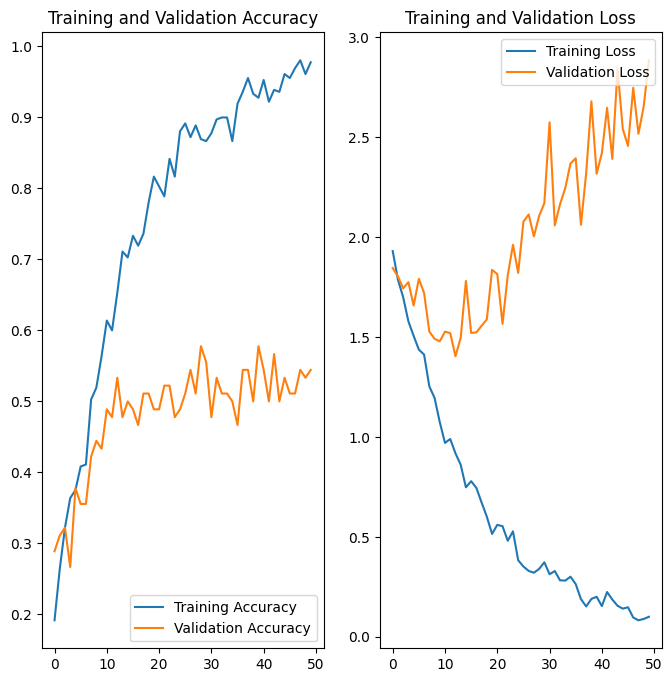

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
character_url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTtPGYNznmMDuGOt5EKx-jir4QJAjb1UXMW_w&s"
character_path = tf.keras.utils.get_file('nesta2', origin=character_url)

img = tf.keras.utils.load_img(
    character_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 71ms/step
This image most likely belongs to Feyre with a 61.02 percent confidence.
